<a href="https://colab.research.google.com/github/javadvahid/ML-course/blob/main/ML_course_project2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression With one Variable

# رگرسیون خطی با یک متغیر ورودی

در این پروژه هدف تخمین سود یک مغازه در یک شهر بر اساس جمعیت آن شهر می باشد

مشخصات دیتا

دیتای ورودی : جمعیت آن شهر(با واحد 10000 نفر)

دیتای خروجی : سود آن مغازه(با واحد 10000 دلار)

In [ ]:
#load data set from a csv file
# csv لود کردن داده های موجود از یک فایل
# در اولین مرحله فایل مربوط به دیتای بخش اول را آپلود کنید
#import pandas libaray for reading a csv file
# به برنامه pandas اضافه کردن کتابخونه 
import pandas as pd
#import numpy
import numpy as np



#read data from project2-data1.csv file 
#داده ها را از فایل مشخص شده بخوانید
data1 = pd.read_csv("/content/project2-data1.csv")

#show a summary of data
#نمایش خلاصه ای از داده ها
data1.head()

,population(10K),profit(10K$)
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
#split the data into input X and output Y
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input feature
X = data1.values[:, 0]
#output
Y = data1.values[:, 1]

#find m
m = Y.shape[0]
print(m)

97


# Data Visualization:

# نمایش داده ها

In [ ]:
#function for plotting data
#تابعی برای نمایش داده ها
import matplotlib.pyplot as plt 
def plotData(x, y):
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('profit')
    plt.xlabel('population')


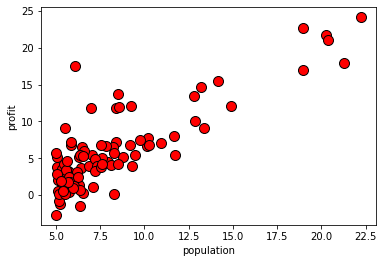

In [ ]:
#Data visualization
#نمایش داده ها اولین قدم بعد از لود کردن داده ها می باشد
plotData(X, Y)

In [ ]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of Y:", Y.shape)


shape of X: (97,)
shape of Y: (97,)


# creating X and Y matrices with the right dimensions as shown in the slide

# دقیقا به صورتی که در اسلاید زیر نمایش داده شده است X,Y ایجاد ماتریس

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [ ]:
#convert X dimension from (m,) to (m, 1)
X = np.expand_dims(X, 1)
#Convert dimension X from (m, 1) to (1, m)
X = np.transpose(X)
X.shape

(1, 97)

In [ ]:
#convert Y dimension from (m,) to (m, 1)
Y = np.expand_dims(Y, 1)
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
Y.shape

(1, 97)

In [ ]:
#add x0=1 to all the data 
#به همه داده ها x0=1 اضافه کردن 
X = np.concatenate([np.ones((1, m)), X], axis=0)
X.shape

(2, 97)

# cost function: vectorized implementation

# پیاده سازی تابع هزینه به صورت برداری

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1BV9HwTMy296EehEJnzMlMD-7kQMp6mCW">
</p>

In [ ]:
#create a function for computing cost J
#تابعی بنویسید که تابع هزینه را محاسبه کند
def computeCost(X, Y, thetatemp):
  m = X.shape[1]

  temp = np.matmul(np.transpose(thetatemp), X) - Y

  cost = np.matmul(temp, np.transpose(temp)) / (2*m)

  return cost


In [ ]:
#initialize theta 
theta = np.array([[0], [0]])
#use the function you created to compute J
cost = computeCost(X, Y, theta)
print("initial cost is:", cost)

initial cost is: [[32.07273388]]


# Gradient Descent: Vectorize implementation

# پیاده سازی کاهش گرادیان به صورت برداری

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1PC-RF-8u2G67eB2BLvlBWikPthLxqYoM">
</p>

In [ ]:
#create a function for gradient descent
def gradientDescent(X, Y, thetatemp, lr, epochs):
  m = X.shape[1]
  J_history = []
  for epoch in range(epochs):
    temp = np.transpose(np.matmul(np.transpose(thetatemp), X) - Y)
    thetatemp = thetatemp - (lr/m) * np.matmul(X, temp)

    J_history.append(computeCost(X, Y, thetatemp)[0, 0])

  return thetatemp, J_history  

In [ ]:
#initialize theta and train linear regression
#انتخاب مقادیر اولیه برای تتا
theta = np.array([[0], [0]])

#set epochs and learning rate
#مقدار دهی برای نرخ یادگیری، تعداد تکرار
epochs = 1500
lr = 0.01
#run gradient descent and print theta
thetanew, J_history = gradientDescent(X, Y, theta, lr, epochs)
print(thetanew)



[[-3.63029144]
 [ 1.16636235]]


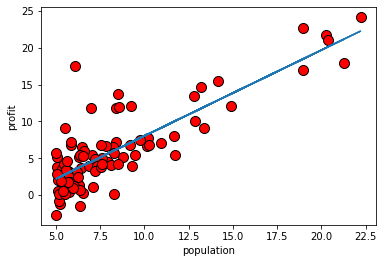

In [ ]:
#plot the line that fits the data
#رسم کردن خطی که داده ها را مدل می کند

#plot the original data
plotData(X[1, :], Y[0, :])

#plot the line
plt.plot(X[1, :], np.matmul(np.transpose(thetanew), X)[0,:])



In [ ]:
#predict profit for different populations
#تخمین سود برای جمعیت های مختلف با استفاده از تتای به دست آمده
#for population of 70000 
profit = np.matmul(np.transpose(thetanew), np.array([[1], [7]]))
print("profit(10K$): ", profit)
print("profit($): ", profit*10000)

profit(10K$):  [[4.53424501]]
profit($):  [[45342.45012945]]


In [ ]:
thetanew[0]*1 + thetanew[1] * 7

array([4.53424501])

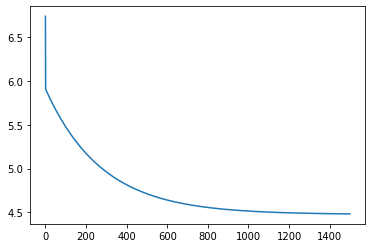

In [ ]:
#visualizing cost J each iteration
#نمایش مقدار تابع هزینه در هر تکرار
plt.plot(J_history)

# Linear Regression with multiple features

# رگرسیون خطی با چند ویژگی ورودی

predict price of the house using multiple input features

تخمین قیمت خانه با استفاده از چند ویژگی ورودی

input featrues are size of the house and number of bedroomss

ویژگی های ورودی اندازه خانه و تعداد اتاق خواب ها می باشد



In [1]:
#load data set from a csv file
# csv لود کردن داده های موجود از یک فایل
# در اولین مرحله فایل مربوط به دیتای بخش دوم را آپلود کنید
#import pandas libaray for reading a csv file
# به برنامه pandas اضافه کردن کتابخونه 
import pandas as pd
import numpy as np
#read data from project2-data2.csv file 
#داده ها را از فایل مشخص شده بخوانید
data2 = pd.read_csv("/content/project2-data2.csv")

#show a summary of data
#نمایش خلاصه ای از داده ها
data2.head()

,size,#bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
#split the data into input X and output Y
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input feature
X = data2.values[:, 0:2]

#output
Y = data2.values[:, 2]

#find m
m = Y.shape[0]
print(m)

47


# mean Normalization:

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1OZfebBMmcG1woMpGg0ad3qDJ6Nd06Kh7">
</p>

In [4]:
def featureNormalize(X):
  X_norm = X.copy()
  mean = np.mean(X_norm, axis=0)
  range1 = np.max(X_norm, axis=0) - np.min(X_norm, axis=0)
  #we can also use standard deviation (sigma) instead of range = max - min
  #sigma = np.std(X_norm, axis=0)
  X_norm = (X_norm - mean)/(range1)
  #X_norm = (X_norm - mean)/(sigma)
  
  return X_norm, mean, range1

In [5]:
X_norm, mean, range1 = featureNormalize(X)
print("mean:", mean)
print("range1 :", range1)

mean: [2000.68085106    3.17021277]
range1 : [3626    4]


# Data Visualization:

# نمایش داده ها

In [6]:
#function for plotting data
#تابعی برای نمایش داده ها
import matplotlib.pyplot as plt 
def plotData(x, y):
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('output')
    plt.xlabel('input')


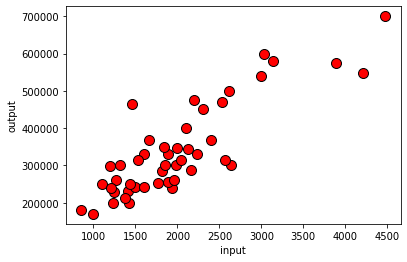

In [7]:
#Data visualization
#نمایش داده ها اولین قدم بعد از لود کردن داده ها می باشد

#plot price-size before normalization
plotData(X[:,0], Y)

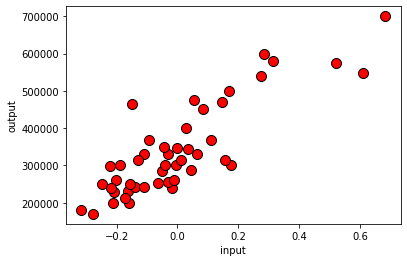

In [8]:
#Data visualization
#نمایش داده ها اولین قدم بعد از لود کردن داده ها می باشد

#plot price-size after normalization
plotData(X_norm[:,0], Y)

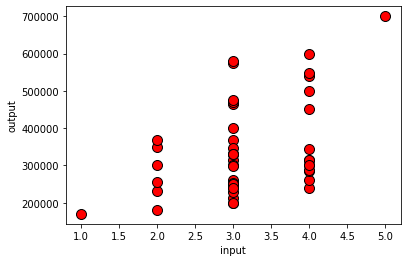

In [9]:
#Data visualization
#نمایش داده ها اولین قدم بعد از لود کردن داده ها می باشد

#plot price-#bedroom before normalization
plotData(X[:,1], Y)

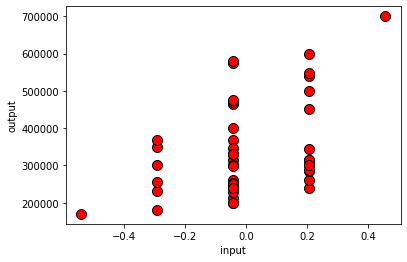

In [10]:
#Data visualization
#نمایش داده ها اولین قدم بعد از لود کردن داده ها می باشد

#plot price-#bedroom after normalization
plotData(X_norm[:,1], Y)

# change the dimenson of matrices X and Y if necessary

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [11]:
print("shape of X_norm: ",X_norm.shape)
print("shape of Y: ",Y.shape)

shape of X_norm:  (47, 2)
shape of Y:  (47,)


In [12]:
#change the dimensions from (m x n) to (n x m)
X_norm = np.transpose(X_norm)
X_norm.shape

(2, 47)

In [13]:
#convert Y dimension from (m,) to (m, 1)
Y = np.expand_dims(Y, 1)
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
Y.shape

(1, 47)

In [14]:
print("shape of X_norm: ",X_norm.shape)
print("shape of Y: ",Y.shape)

shape of X_norm:  (2, 47)
shape of Y:  (1, 47)


In [15]:
#add x0=1 to all the data
#به همه داده ها x0=1 اضافه کردن 
import numpy as np
m = X_norm.shape[1]
X_norm = np.concatenate([np.ones((1, m)), X_norm], axis=0)
X_norm.shape

(3, 47)

In [16]:
#create a function for computing cost J
#تابعی بنویسید که تابع هزینه را محاسبه کند
def computeCost(X, Y, thetatemp):
  m = X.shape[1]
  
  temp = np.matmul(np.transpose(thetatemp), X) - Y
  cost = (1/(2*m)) * np.matmul(temp, np.transpose(temp))

  return cost


In [17]:
#initialize theta 
theta = np.array([[0], [0], [0]])
#sue the function computeCost to compute J
J = computeCost(X_norm, Y, theta)
print("cost with initial theta", J)

cost with initial theta [[6.55915481e+10]]


In [18]:
#create a function for gradient descent
def gradientDescent(X, Y, thetatemp, lr, num_epochs):
  m = X.shape[1]
  #use a python list to save cost every epoch
  J_history = []

  for epoch in range(num_epochs):
    temp = np.matmul(X, np.transpose(np.matmul(np.transpose(thetatemp), X) - Y))
    
    thetatemp = thetatemp - (lr/m)*temp
    J_history.append(computeCost(X, Y, thetatemp)[0,0])

  return thetatemp, J_history  

In [19]:
#initialize theta and train linear regression
#انتخاب مقادیر اولیه برای تتا
#set epochs and learning rate
#مقدار دهی برای نرخ یادگیری، تعداد تکرار
theta = np.array([[-1], [0], [-1]])
epochs = 500
lr = 0.001
theta, J_history = gradientDescent(X_norm, Y, theta, lr, epochs)
print(theta)

[[133992.98386537]
 [ 11303.93463133]
 [  5037.79834439]]


In [20]:
#preidct values for features size=500 and #bedrooms=5
#first normalize the features
x1norm = (500-mean[0])/range1[0]
x2norm = (5-mean[1])/range1[1]
print("x1norm : ", x1norm)
print("x2norm : ", x2norm)
price = theta[0] + theta[1] * x1norm + theta[2] * x2norm
print("predicted price = ", price)

x1norm :  -0.4138667542922862
x2norm :  0.45744680851063835
predicted price =  [131619.18590333]


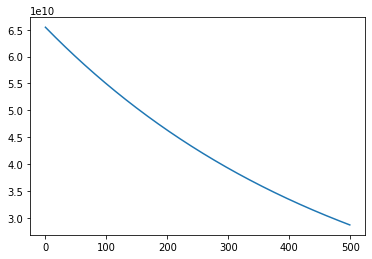

In [21]:
#visualizing cost J each iteration
#نمایش مقدار تابع هزینه در هر تکرار
plt.plot(J_history)

# Use scikit learn for linear regression

In [22]:
#load data set from a csv file
# csv لود کردن داده های موجود از یک فایل
# در اولین مرحله فایل مربوط به دیتای بخش دوم را آپلود کنید
#import pandas libaray for reading a csv file
# به برنامه pandas اضافه کردن کتابخونه 
import pandas as pd
import numpy as np

#read data from project2-data2.csv file 
#داده ها را از فایل مشخص شده بخوانید
data2 = pd.read_csv("/content/project2-data2.csv")

#show a summary of data
#نمایش خلاصه ای از داده ها
data2.head()

,size,#bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [23]:
#split the data into input X and output Y
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input feature
X = data2.values[:, 0:2]

#output
Y = data2.values[:, 2]

#find m
m = Y.shape[0]


In [24]:
def featureNormalize(X):
  X_norm = X.copy()
  mean = np.mean(X_norm, axis=0)
  range1 = np.max(X_norm, axis=0) - np.min(X_norm, axis=0)
  #we can also use standard deviation (sigma) instead of range = max - min
  #sigma = np.std(X_norm, axis=0)
  X_norm = (X_norm - mean)/(range1)
  #X_norm = (X_norm - mean)/(sigma)
  
  return X_norm, mean, range1

In [25]:
X_norm, mean, range1 = featureNormalize(X)


In [26]:
from sklearn import linear_model

model = linear_model.SGDRegressor(loss='squared_error' ,
                                  fit_intercept=True,
                                  max_iter=5000,
                                  learning_rate='constant',
                                  eta0=0.001)
model.fit(X_norm, Y)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=5000)

In [27]:
#predict for input size=500 and #bedrooms= 5
x1norm = (500-mean[0])/range1[0]
x2norm = (5-mean[1])/range1[1]
model.predict(np.array([[x1norm, x2norm]]))

array([130563.32496494])